## AIF-P01 실습문제
- 팀번호: 9팀
- 참여자: 장문경(22312047)

### 문제1

- Iris dataset을 읽어서, 가로축은 sepal.length, 세로축은 sepal.width가 되도록 하라.
- 또한 variety별로 다른 색으로 구분하라.
- iris dataset은 아래의 링크에 있음.

'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'



   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


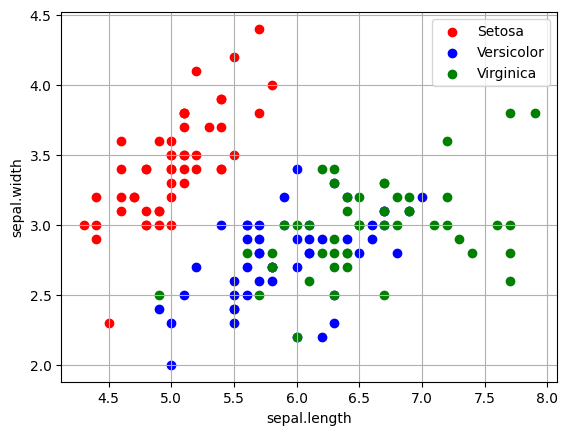

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_iris = pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')
print(df_iris.head())

Setosa = df_iris[df_iris['variety'] == 'Setosa']
Versicolor = df_iris[df_iris['variety'] == 'Versicolor']
Virginica = df_iris[df_iris['variety'] == 'Virginica']

plt.scatter(Setosa['sepal.length'], Setosa['sepal.width'], color = 'red', label = 'Setosa')
plt.scatter(Versicolor['sepal.length'], Versicolor['sepal.width'], color = 'blue', label = 'Versicolor')
plt.scatter(Virginica['sepal.length'], Virginica['sepal.width'], color = 'green', label = 'Virginica')
plt.xlabel('sepal.length')
plt.ylabel('sepal.width')
plt.legend()
plt.grid()

plt.show()

### 문제2:
#### Auto MPG dataset

1.   누락된 항목을 찾아서 출력하기
 - count()를 이용하면 누락된 항목을 알아낼 수 있음.
2.   누락된 항목을 가지고 있는 행을 삭제하기
3.   누락된 항목을 그 열의 데이터들의 평균으로 대체하기




In [7]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras

dataset_path='http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names=['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration','Model Year','Origin']
raw_dataset=pd.read_csv(dataset_path,names=column_names, na_values='?',comment='\t', sep=' ',skipinitialspace=True)
mpg_df=raw_dataset.copy()
mpg_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


- 누락된 항목을 알아내고 출력하기.

In [8]:
# 여기에 코드 작성.
print(mpg_df.count())

MPG             398
Cylinders       398
Displacement    398
Horsepower      392
Weight          398
Acceleration    398
Model Year      398
Origin          398
dtype: int64


In [9]:
# 누락된 데이터 출력
missing_data = mpg_df[mpg_df['Horsepower'].isna()]
missing_data

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
32,25.0,4,98.0,NaN,2046.0,19.0,71,1
126,21.0,6,200.0,NaN,2875.0,17.0,74,1
330,40.9,4,85.0,NaN,1835.0,17.3,80,2
336,23.6,4,140.0,NaN,2905.0,14.3,80,1
354,34.5,4,100.0,NaN,2320.0,15.8,81,2
374,23.0,4,151.0,NaN,3035.0,20.5,82,1


In [11]:
# 누락된 데이터를 버림. (INDEX = 30~33까지를 보여줌줌)
mpg_df_del = mpg_df.copy()
mpg_df_del.dropna(axis = 0, how = 'any', inplace = True)
mpg_df_del[30:33]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
30,28.0,4,140.0,90.0,2264.0,15.5,71,1
31,25.0,4,113.0,95.0,2228.0,14.0,71,3
33,19.0,6,232.0,100.0,2634.0,13.0,71,1


In [14]:
#누락된 항목을 평균으로 대체하고 대체된 것을 보여주기.
mpg_df_mean = mpg_df.copy()
mpg_df_mean.fillna(mpg_df_mean['Horsepower'].mean(), inplace = True)
print(mpg_df_mean[30:33])

     MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
30  28.0          4         140.0   90.000000  2264.0          15.5   
31  25.0          4         113.0   95.000000  2228.0          14.0   
32  25.0          4          98.0  104.469388  2046.0          19.0   

    Model Year  Origin  
30          71       1  
31          71       3  
32          71       1  
